In [1]:
import sqlite3
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import collections
import numpy as np
import networkx as nx
from collections import defaultdict

mean of followee_num 176.2822139826459
median of followee_num 67.0
standard deviation of 565.8748382903689 

mean of follower_num 3620.0144872137917
median of follower_num 112.0
standard deviation of 22978.48918276429 

mean of answer_num 68.9406368258094
median of answer_num 17.0
standard deviation of 225.86513202595964 

mean of agree_num 3858.422116891556
median of agree_num 96.0
standard deviation of 21951.4144036603 

mean of thanks_num 865.2648599059669
median of thanks_num 28.0
standard deviation of 4627.645428375382 



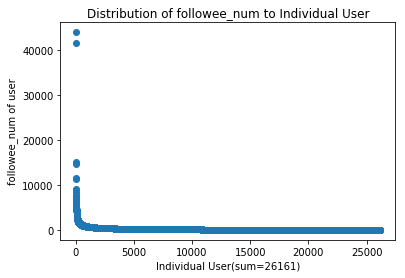

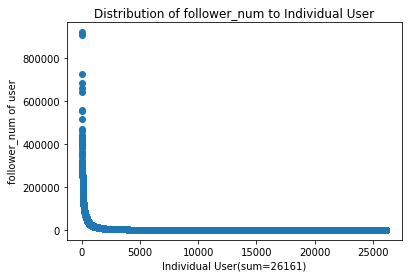

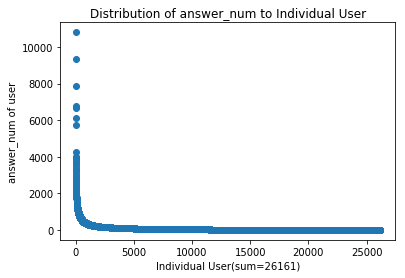

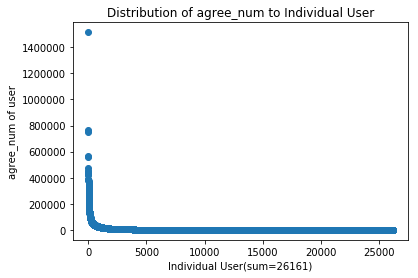

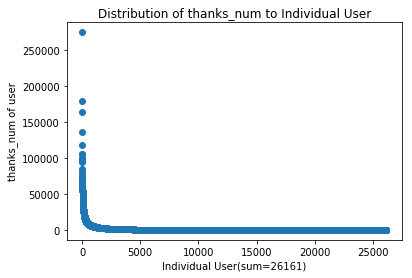

In [30]:
#关注数（followee）、关注者数（follower，粉丝数）、回答数（answer）、收到赞同数（agree）和收到感谢数（thanks）  feature to Individual User分布图
def plot_user_distribution():

    conn = sqlite3.connect("zhihu.db")
    user_data = pd.read_sql('select * from User', conn) #database data -> pandas.DataFrame    
    conn.close()
    
    feature_list = ['followee_num', 'follower_num', 'answer_num', 'agree_num', 'thanks_num']   
    
    for feature in feature_list:    
        plt.figure(feature)
        plt.title("Distribution of " + feature + ' to Individual User')
        plt.xlabel("Individual User(sum=26161)")
        plt.ylabel(feature + " of user")
        user = list(range(len(user_data)))
        feature_value = sorted(list(user_data[feature]), reverse=True)#DataFrame -> list -> do sort
        plt.scatter(user, feature_value)
        print 'mean of', feature, np.mean(list(user_data[feature]))
        print 'median of', feature, np.median(list(user_data[feature]))
        print 'standard deviation of', np.std(list(user_data[feature])), '\n'

    plt.show()
    
plot_user_distribution()

D:\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


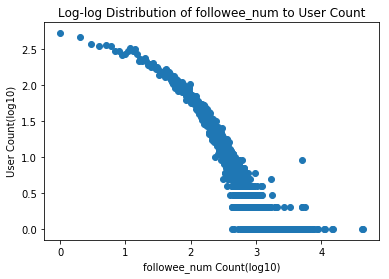

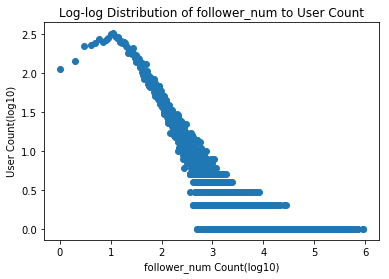

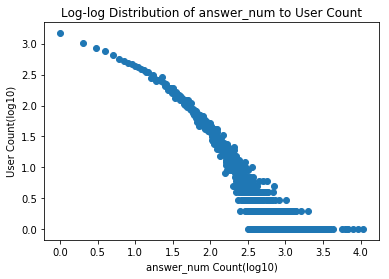

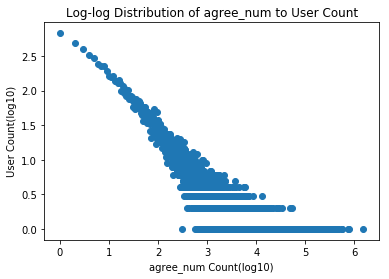

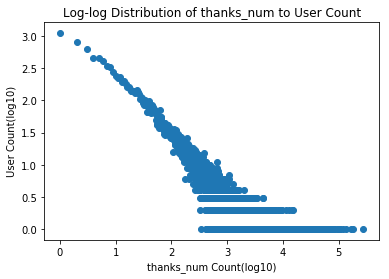

In [6]:
###关注数（followee）、关注者数（follower，粉丝数）、回答数（answer）、收到赞同数（agree）和收到感谢数（thanks）Individual User to feature
def plot_user_summary_log_log_distribution():
    '''
    for followee_num / follower_num, this is a plot of (out/in) degree distribution 
    '''
    conn = sqlite3.connect("zhihu.db")
    user_data = pd.read_sql('select * from User', conn) #database data -> pandas.DataFrame    
    conn.close()
    
    feature_list = ['followee_num', 'follower_num', 'answer_num', 'agree_num', 'thanks_num']   
    
    for feature in feature_list:    
        plt.figure('log-log ' + feature)
        plt.title('Log-log Distribution of ' + feature + ' to User Count')
        plt.xlabel(feature + ' Count(log10)')
        plt.ylabel("User Count(log10)")
        feature_count_pairs = collections.Counter(list(user_data[feature])).most_common()
        feature_value = np.log10(zip(*feature_count_pairs)[0])
        user_count = np.log10(zip(*feature_count_pairs)[1])
        plt.scatter(feature_value, user_count)

    plt.show()
    
plot_user_summary_log_log_distribution()

D:\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


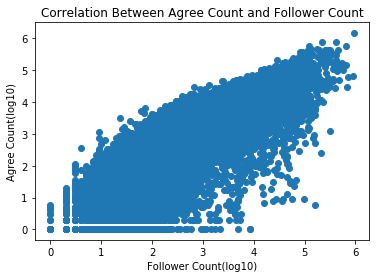

In [9]:
# 用户的赞同数和粉丝数两个指标
def plot_user_agree_and_follower_correlation():
    '''
    '''
    conn = sqlite3.connect("zhihu.db")
    user_data = pd.read_sql('select * from User', conn) #database data -> pandas.DataFrame    
    conn.close()
    
    plt.figure('agree and follower')    
    plt.title('Correlation Between Agree Count and Follower Count')
    plt.xlabel('Follower Count(log10)')
    plt.ylabel("Agree Count(log10)")   
    agree_num = np.log10(list(user_data['agree_num']))
    follower_num = np.log10(list(user_data['follower_num']))
    plt.scatter(follower_num, agree_num)
    
    plt.show()
    
plot_user_agree_and_follower_correlation()

In [13]:
 conn = sqlite3.connect("zhihu.db")
user_data = pd.read_sql('select * from User', conn) #database data -> pandas.DataFrame    
conn.close()


In [14]:
user_data

,id,user_url,user_id,followee_num,follower_num,answer_num,agree_num,thanks_num,layer,is_crawled
0,1,ji-yi-chao,季逸超,20,16905,11,2855,624,1,None
1,2,cogito,佐藤謙一,19,254252,18,46878,10730,1,None
2,3,lycheeorange,郦橙锦妖一只麋鹿,827,33125,356,73199,19775,1,None
3,4,lilydjwg,依云,245,3315,605,2438,519,1,None
4,5,lanlingyeyu,兰陵,329,28578,109,58872,15749,1,None
5,6,oxygen,黄海均,1118,57640,378,6372,1555,1,None
6,7,xiao-peng-fei-86,肖鹏飞,194,18,1,0,0,1,None
7,8,chen-xing-yi,陈星汉,4,22150,17,2355,589,1,None
8,9,kant,邹剑波Kant,302,63375,593,17835,3689,1,None
9,10,maxint64,Maxint64,48,24,26,122,24,1,None


## 以下只根据关注来看

In [15]:
##构造图并画出
# def graph():
conn = sqlite3.connect("zhihu.db")     
# following_data = pd.read_sql('select user_url, followee_url from Following where followee_url in (select user_url from User where agree_num > 50000) and user_url in (select user_url from User where agree_num > 50000)', conn)        
# following_data = pd.read_sql('select user_url, followee_url from Following where followee_url in (select user_url from User where agree_num > 10000) and user_url in (select user_url from User where agree_num > 10000)', conn)        
following_data = pd.read_sql('select user_url, followee_url from Following ', conn)        

conn.close()

G = nx.DiGraph()
for d in following_data.iterrows():
    G.add_edge(d[1][0], d[1][1])
plt.figure(figsize=(20,20))
# nx.draw(G,pos = nx.spring_layout(G),node_color = 'r',edge_color = 'y', with_labels = True,font_size =15,node_size =50, width =1.0 )
# plt.title('The Graph of G')
# plt.show()

nx.draw_networkx(G,font_size =15)
plt.title('The Graph of G')
plt.show()
        


MemoryError: 

the number of nodes is:  375
the number of edges is:  27324


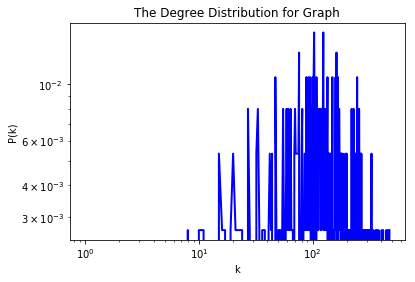

The average length of shortest path is  1.82311586453


In [8]:
##社交网络基本属性
def basic_property():

##社交网络的节点数和边数
    nodes = G.number_of_nodes()
    edges = G.number_of_edges()
    print "the number of nodes is: " , nodes
    print "the number of edges is: " , edges
    
##社交网络度分布
    degree = nx.degree_histogram(G)
    x=range(len(degree))#生成X轴序列，从1到最大度  
    y=[z/float(sum(degree))for z in degree]#将频次转化为频率，利用列表内涵  
    plt.loglog(x,y,color="blue",linewidth=2)#在双对坐标轴上绘制度分布曲线  
    plt.title("The Degree Distribution for Graph")
    plt.xlabel("k")
    plt.ylabel("P(k)")
    plt.show()
    
##社交网络聚集系数 有向图无法求
#     cluster = nx.average_clustering(G)
#     print cluster

##平均最短路径长度
    s_path = nx.average_shortest_path_length(G)
    print "The average length of shortest path is ", s_path
    

basic_property()

density of graph: 0.194823529412


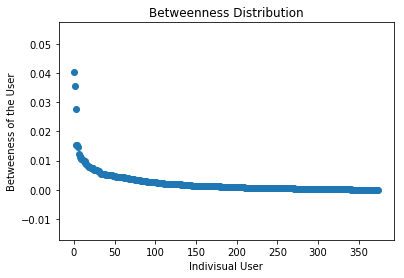

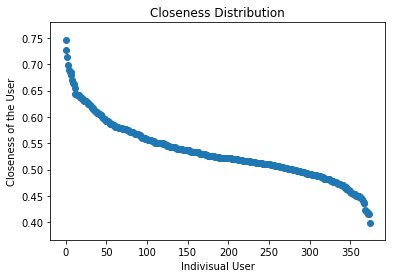

In [9]:
# 衡量一个用户在关注网络中的“重要程度”
def density_centrality():

    print 'density of graph:', nx.density(G)

    user_betweenness_list = sorted(nx.betweenness_centrality(G).items(), lambda x, y: cmp(x[1], y[1]), reverse=True) #result like [(2, 0.0), (3, 0.0), (1, 1.0)]
    betweenness_list = zip(*user_betweenness_list)[1]# result like: [(2, 3, 1), (0.0, 0.0, 1.0)][1]; zip(*) is like un zip()

    #betweenness_count_pairs = collections.Counter(list(betweenness_list)).most_common() # list of element like: (0.0006937913420042883, 1)
    #b_value = zip(*betweenness_count_pairs)[0] #unzip to get 0.0006937913420042883
    #b_count = zip(*betweenness_count_pairs)[1]    
    #pylab.figure('Betweenness Distribution')
    #pylab.title('Betweenness Distribution')
    #pylab.xlabel('Betweenness')
    #pylab.ylabel('Count')    
    #pylab.scatter(b_value, b_count)

    plt.figure('Betweenness Distribution')
    plt.title('Betweenness Distribution')
    plt.xlabel('Indivisual User')
    plt.ylabel('Betweeness of the User')       
    plt.scatter(list(range(len(betweenness_list))), betweenness_list)

    user_closeness_list = sorted(nx.closeness_centrality(G).items(), lambda x, y: cmp(x[1], y[1]), reverse=True) #Dict.items(): {1: 1.0, 2: 0.0, 3: 0.0} -> [(1, 1.0), (2, 0.0), (3, 0.0)]
    closeness_list = zip(*user_closeness_list)[1]   

    #closeness_count_pairs = collections.Counter(list(closeness_list)).most_common()
    #c_value = zip(*closeness_count_pairs)[0]
    #c_count = zip(*closeness_count_pairs)[0]    
    #pylab.figure('Closeness Distribution')
    #pylab.title('Closeness Distribution')
    #pylab.xlabel('Closeness')
    #pylab.ylabel('Count')        
    #pylab.scatter(c_value, c_count)

    plt.figure('Closeness Distribution')
    plt.title('Closeness Distribution')
    plt.xlabel('Indivisual User')
    plt.ylabel('Closeness of the User')       
    plt.scatter(list(range(len(closeness_list))), closeness_list)
    
density_centrality()

In [10]:
###大V排序 pagerank+hits
def pagerank_hits():

    # PageRank
    pr = nx.pagerank(G)
    prsorted = sorted(pr.items(), key=lambda x: x[1], reverse=True)
    print 'pagerank top 100:\n'
    for p in prsorted[:100]:
        print p[0], p[1]
    
    # HITS
    hub, auth = nx.hits(G)
    print 'hub top 100:\n'
    for h in sorted(hub.items(), key=lambda x: x[1], reverse=True)[:100]:
        print h[0], h[1]
    print '\nauth top 100:\n'    
    for a in sorted(auth.items(), key=lambda x: x[1], reverse=True)[:100]:     
        print a[0], a[1]
        
pagerank_hits()

pagerank top 100:

jixin 0.0112013915988
ma-bo-yong 0.0103123719944
zhang-jia-wei 0.0102488666825
liangbianyao 0.00949595715406
commando 0.00902877663889
yolfilm 0.0087246245994
raymond-wang 0.00849671727475
imike 0.00820231045379
cai-tong 0.00802051329484
magie 0.00771015418573
aton 0.00765069715614
amuro1230 0.00758888368892
zhu-xuan-86 0.00755013183481
nordenbox 0.00753267179708
Tian-Hao- 0.00738164972987
fu-er 0.00734182760758
talich 0.00723141216282
xiepanda 0.00704533003358
miaomiaomiao 0.00692644270571
xiaodaoren 0.00669707500544
wangnuonuo 0.00664284871691
magasa 0.00663000159683
zhou-xiao-nong 0.00650550213081
zhang-xiao-bei 0.00644693602529
chenqin 0.00638537166536
chibaole 0.00633483028147
dong-ji-zai-hang-zhou 0.00629353253413
su-fei-17 0.00597930204254
lisongwei 0.00583125970672
fei-niao-bing-he 0.0057421692635
leng-zhe 0.00572873396211
BlackCloak 0.0056815314931
bo-cai-28-7 0.00559181764203
shenbin 0.00541067332692
ccat 0.00540749946795
lawrencelry 0.00539154233052
cheng-

In [11]:
##热门话题分析
def dominant_set_topic_rank():
    #dominant_set
    dominant_set = nx.dominating_set(G)
    print 'user number in dominant set:', len(dominant_set)

    #topics answered by users in dominant_set
    conn = sqlite3.connect("zhihu.db")   
    user_topic_data = pd.read_sql('select user_url, topic from UserTopic', conn) 
       
    topicdict = defaultdict(int)
    i = 0#counter
    for row in user_topic_data.iterrows():
        user_url = row[1][0]
        topic = row[1][1]
        if user_url in dominant_set:
            topicdict[topic] += 1
        i += 1
        #if i % 100 == 0:
            #print i
    conn.close()
    
    topicsorted = sorted(topicdict.items(), key=lambda x: x[1], reverse=True)
    
    # topic top 100
    for t in topicsorted[:100]:
        print t[0],t[1]


dominant_set_topic_rank()

user number in dominant set: 46
历史 1668
调查类问题 1519
生活 1399
社会 1135
互联网 1099
政治 865
心理学 829
知乎 791
足球 771
电影 720
人际交往 705
两性关系 703
恋爱 691
中国 575
情感 542
经济 493
编程 493
你如何评价 X 487
日本 487
程序员 451
计算机 441
文化 380
生物学 372
音乐 368
科技 366
Android 365
女性 361
法律 360
手机 358
人生 349
文学 334
游戏 333
爱情 323
物理学 322
性生活 320
心理 306
体育 303
教育 303
科学 301
Microsoft Windows 297
中国历史 284
军事 283
经济学 276
生活经历 264
冷知识 264
创业 261
苹果公司 (Apple Inc.) 260
动漫 258
微软（Microsoft） 254
金融 254
编程语言 253
恋爱心理 247
美食 246
学习 243
战争 239
X 是种怎样的体验 233
篮球 228
大学 225
字体 221
健康 221
美国 220
化学 214
汽车 214
国际政治 212
设计 210
影视评论 209
新闻 206
历史人物 206
产品经理 205
知乎社区 204
恋人相处 204
道德 204
医学 203
社会学 202
女生 202
男性 200
NBA 200
哲学 196
笔记本电脑 194
异性交往 192
微信 191
百度 189
健身 186
数学 186
信息技术（IT） 185
转基因 183
软件 183
魔兽世界 180
工作 177
市场营销 176
知乎用户 172
婚姻 171
阅读 170
大学生 170
漫画 167
生活常识 167
谷歌 (Google) 167
个人情感咨询 167
自然科学 165
罗永浩 163


links number: 231416
components nodes distribution: [1853, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
average_shortest_path_length of components who has over 1 nodes:


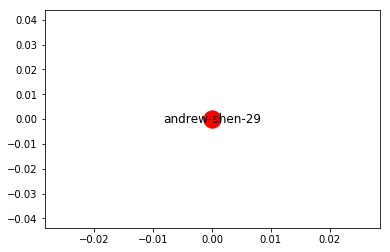

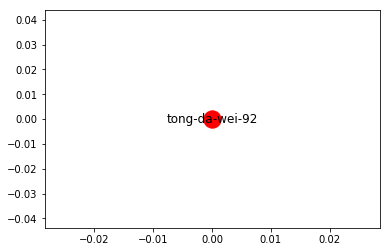

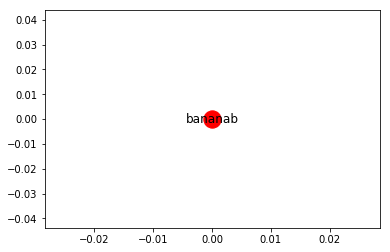

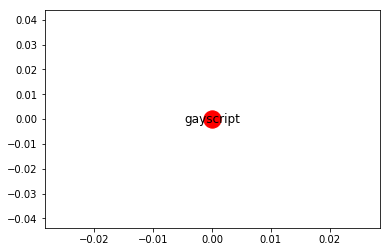

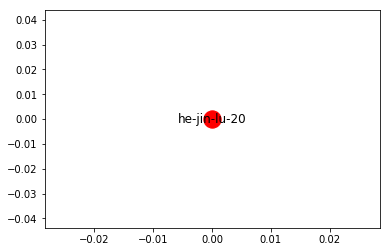

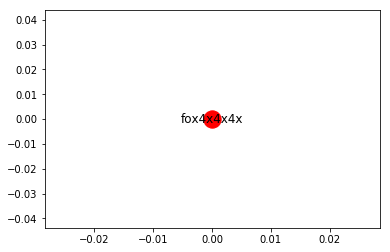

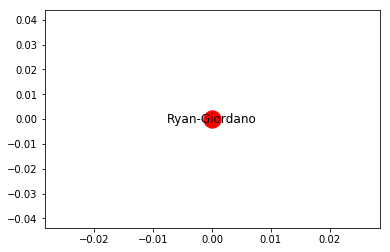

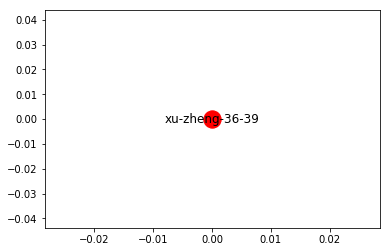

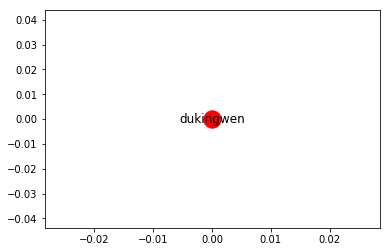

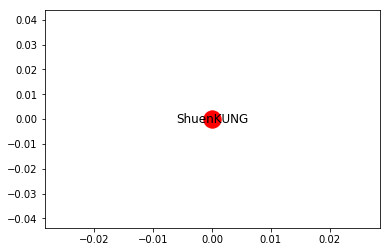

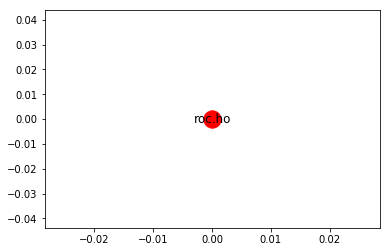

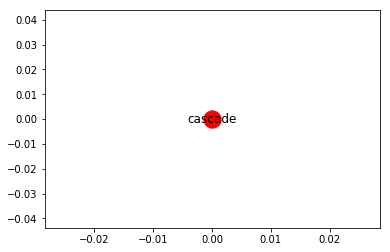

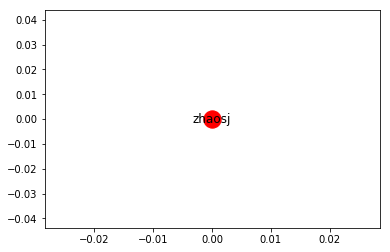

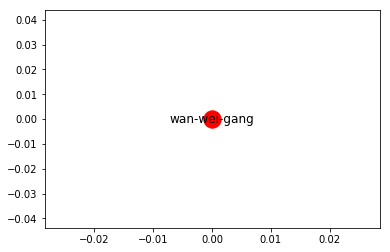

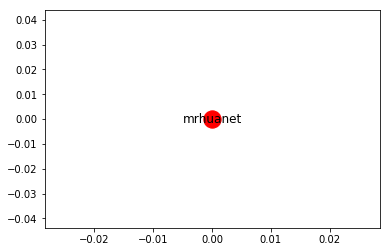

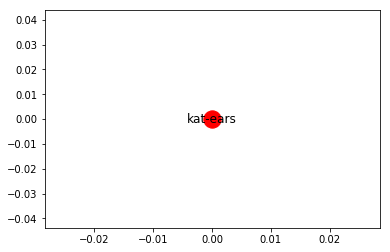

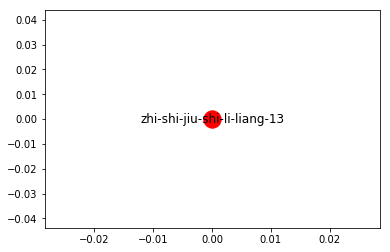

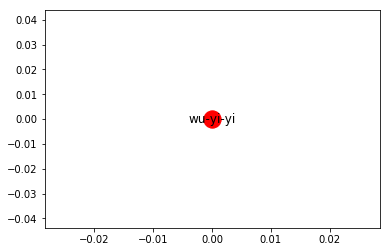

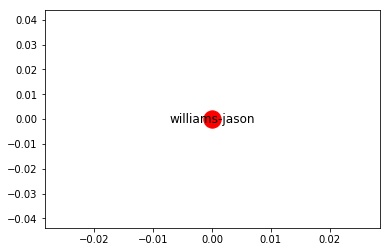

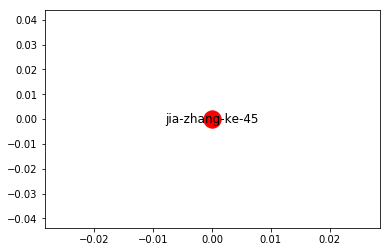

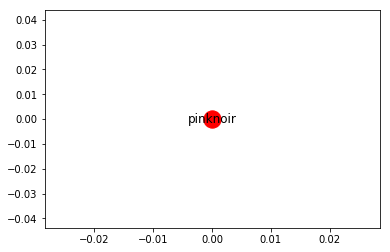

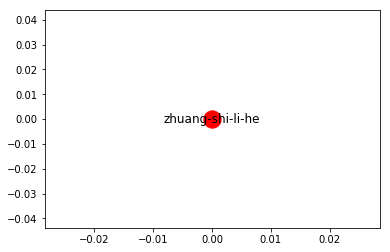

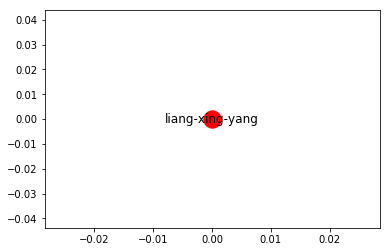

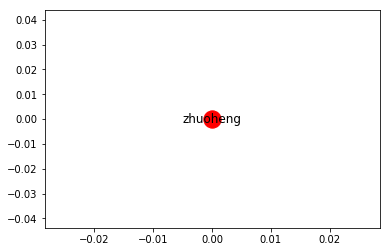

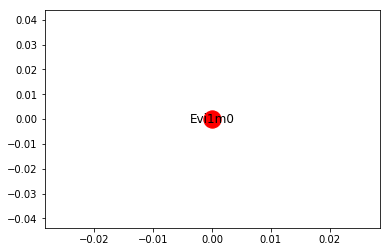

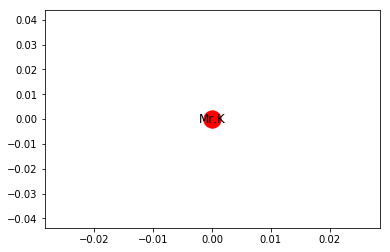

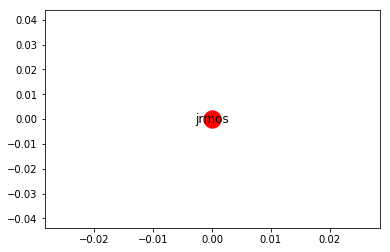

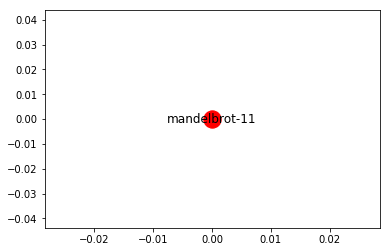

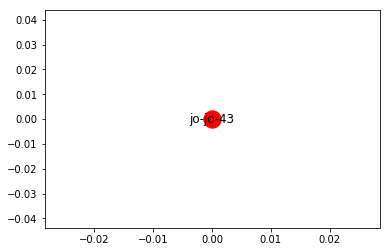

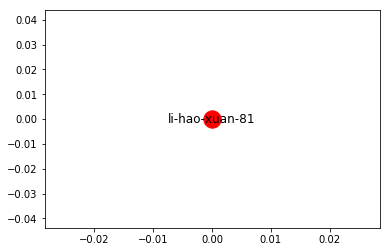

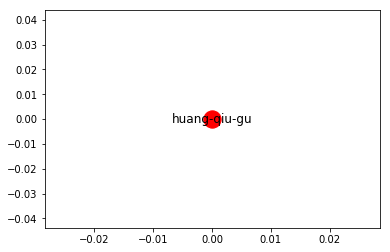

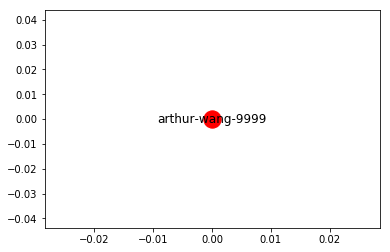

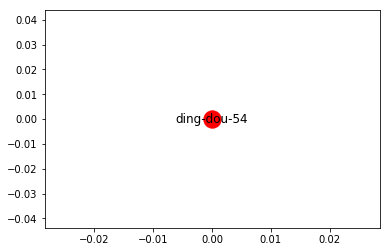

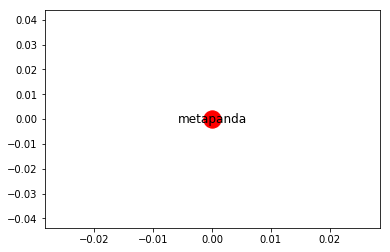

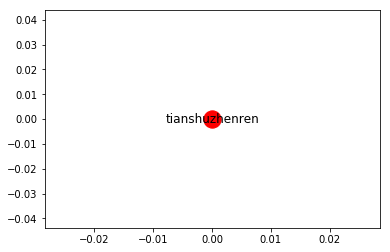

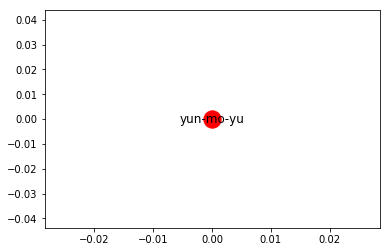

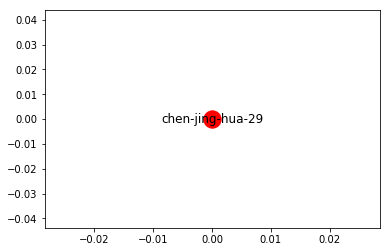

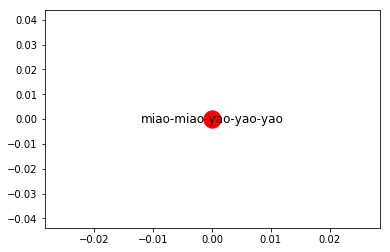

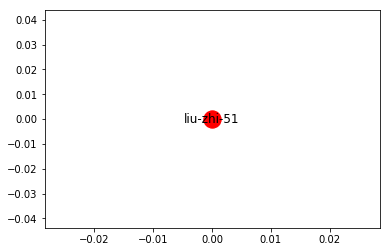

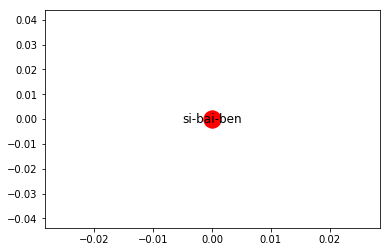

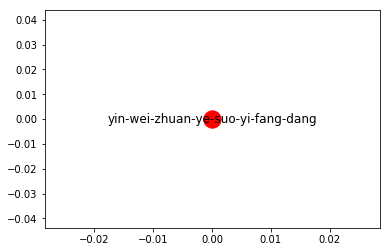

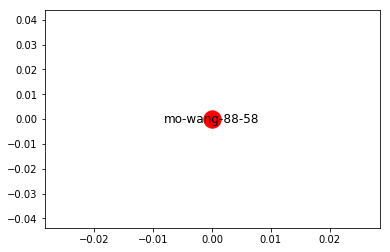

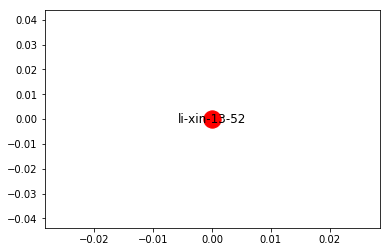

2.11310244668
diameter 5
radius 2


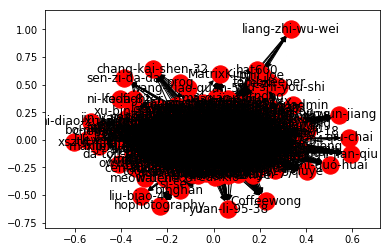

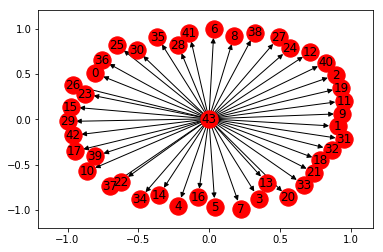

In [16]:
##强连通分量示意图
def strongly_connected_components():
    
    G = nx.DiGraph()
    cnt = 0
    for d in following_data.iterrows():
        G.add_edge(d[1][0],d[1][1])
        cnt += 1
    print 'links number:', cnt

    scompgraphs = nx.strongly_connected_component_subgraphs(G)
    scomponents = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
    print 'components nodes distribution:', [len(c) for c in scomponents]
    
    #plot graph of component, calculate saverage_shortest_path_length of components who has over 1 nodes
    index = 0
    print 'average_shortest_path_length of components who has over 1 nodes:'
    for tempg in scompgraphs:
        index += 1
        if len(tempg.nodes()) != 1:
            print nx.average_shortest_path_length(tempg)
            print 'diameter', nx.diameter(tempg)
            print 'radius', nx.radius(tempg)
        plt.figure(index)
        nx.draw_networkx(tempg)
        plt.show()

    # Components-as-nodes Graph
    cG = nx.condensation(G)
    plt.figure('Components-as-nodes Graph')
    nx.draw_networkx(cG)
    plt.show() 
    
strongly_connected_components()